# Assignment 2 Notebook

# 1. Import Libraries

In [37]:
import pandas as pd
import numpy as np
from datetime import time
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


# 2. Exploratory Data Analysis (EDA) 

**About the Data**

**Flight Price Prediction:**

- Business Class flight prices
    https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=business.csv

- Economy Class flight prices
    https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=economy.csv





**Import, view, and analyse the data for missing, outliers, and cleaning**

In [38]:
business = pd.read_csv('business.csv')
business

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"


In [39]:
business.stop.unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t

In [40]:
economy = pd.read_csv('economy.csv')
economy

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


In [41]:
economy.stop.unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t

# 3. Preproccessing

**A. Feature Engineering**

**Manipulate "stop" column to be readable and change to 3 categories**
- 1-stop to 1
- 2+-stop to 2
- non-stop to 0

In [42]:
business.loc[(business['stop'] != 'non-stop ') & (business['stop'] != '2+-stop'), 'stop'] = 1
business.loc[business['stop'] == '2+-stop', 'stop'] = 2
business.loc[business['stop'] == 'non-stop ', 'stop'] = 0
business

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,0,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,0,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1,17:00,Hyderabad,"81,585"


In [43]:
business.stop.unique()

array([0, 1, 2], dtype=object)

In [44]:
economy.loc[(economy['stop'] != 'non-stop ') & (economy['stop'] != '2+-stop'), 'stop'] = 1
economy.loc[economy['stop'] == '2+-stop', 'stop'] = 2
economy.loc[economy['stop'] == 'non-stop ', 'stop'] = 0
economy

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,0,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,0,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,0,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,0,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,0,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1,09:05,Hyderabad,"8,640"


**Combine business class flights and economy class flights into 1 dataframPandas Dataframe**

In [45]:
economy['flight_class'] = 'economy'
business['flight_class'] = 'business'

flights = pd.concat([business, economy], ignore_index=True)

In [46]:
flights

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,flight_class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,0,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,0,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1,23:55,Mumbai,"46,690",business
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1,20:55,Hyderabad,"7,697",economy
300257,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1,20:55,Hyderabad,"7,709",economy
300258,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1,09:05,Hyderabad,"8,640",economy
300259,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1,09:05,Hyderabad,"8,640",economy


**B. Checking for Missing/Null values**

**Total count of missing values**

In [47]:

dfNullVals = flights.isnull().sum().to_frame()
dfNullVals = dfNullVals.rename(columns = {0:'Null'})
dfNullVals

,Null
date,0
airline,0
ch_code,0
num_code,0
dep_time,0
from,0
time_taken,0
stop,0
arr_time,0
to,0


**Total count of non-missing values**

In [48]:
dfNotNullVals = flights.notna().sum().to_frame()
dfNotNullVals = dfNotNullVals.rename(columns = {0:'Not Null'})
dfNotNullVals

,Not Null
date,300261
airline,300261
ch_code,300261
num_code,300261
dep_time,300261
from,300261
time_taken,300261
stop,300261
arr_time,300261
to,300261


**Sumary of missing/null values**

In [49]:
dfNullCount = pd.concat([dfNullVals, dfNotNullVals], ignore_index=False, axis=1).reset_index()
dfNullCount = dfNullCount.rename(columns = {'index':'Category'})
dfNullCount

,Category,Null,Not Null
0,date,0,300261
1,airline,0,300261
2,ch_code,0,300261
3,num_code,0,300261
4,dep_time,0,300261
5,from,0,300261
6,time_taken,0,300261
7,stop,0,300261
8,arr_time,0,300261
9,to,0,300261


In [50]:
profile = ProfileReport(flights, title=f"Profiling Report of Flight Data" )
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**A. Feature Engineering**

**Combine the ch_code with num_code columns to create a flight_number column**

In [51]:
flights['flight_number'] = flights['ch_code'].astype('str') + '-'  + flights['num_code'].astype(str)
flights['flight_number']

0         AI-868
1         AI-624
2         AI-531
3         AI-839
4         AI-544
           ...  
300256    UK-832
300257    UK-832
300258    UK-826
300259    UK-822
300260    UK-824
Name: flight_number, Length: 300261, dtype: object

**Clean the "time_taken" column to convert to new column in decimal format**
- remove the m and h in column "time_taken"
- create an hour an minute temporary column on the space charater
- add a zero where required
- combine hour and minute to a new "flight_duration" column by adding the hour to minute divided by 60 minutes to convert minutes to hours

In [52]:
flights['time_taken'] = flights['time_taken'].str.replace("m", "").str.replace("h", "")
flights['time_taken']

0         02 00
1         02 15
2         24 45
3         26 30
4         06 40
          ...  
300256    13 50
300257    13 50
300258    20 35
300259    23 20
300260    24 25
Name: time_taken, Length: 300261, dtype: object

In [53]:
flights[['hour', 'minute']] = flights['time_taken'].str.split(' ', expand=True)
flights[['hour', 'minute']]

,hour,minute
0,02,00
1,02,15
2,24,45
3,26,30
4,06,40
...,...,...
300256,13,50
300257,13,50
300258,20,35
300259,23,20


In [54]:
flights['hour'] = flights['hour'].astype(float)
flights['minute'] = flights['minute'].replace("", '0').astype('float64')
flights['flight_duration'] = flights['hour'] + (flights['minute'] / 60)
flights['flight_duration'] 

0          2.000000
1          2.250000
2         24.750000
3         26.500000
4          6.666667
            ...    
300256    13.833333
300257    13.833333
300258    20.583333
300259    23.333333
300260    24.416667
Name: flight_duration, Length: 300261, dtype: float64

**Convert the "dep_time" and "arr_time" to datetime format then create categories column departure_time, and arrival_time**
- 00:00 to 06:00 ----> early morning
- 06:01 to 12:00 ----> morning
- 12:01 to 17:00 ----> afternoon
- 17:01 to 23:59 ----> evening

In [55]:
flights['dep_time'] = pd.to_datetime(flights['dep_time']).dt.time
flights.loc[((flights['dep_time'] >= pd.to_datetime('00:00', format='%H:%M').time()) & (flights['dep_time'] <= pd.to_datetime('06:00', format='%H:%M').time())), 'depature_time'] = 'early_morning'
flights.loc[((flights['dep_time'] >= pd.to_datetime('06:01', format='%H:%M').time()) & (flights['dep_time'] <= pd.to_datetime('12:00', format='%H:%M').time())), 'depature_time'] = 'morning'
flights.loc[((flights['dep_time'] >= pd.to_datetime('12:01', format='%H:%M').time()) & (flights['dep_time'] <= pd.to_datetime('17:00', format='%H:%M').time())), 'depature_time'] = 'afternoon'
flights.loc[((flights['dep_time'] >= pd.to_datetime('17:01', format='%H:%M').time()) & (flights['dep_time'] <= pd.to_datetime('23:59', format='%H:%M').time())), 'depature_time'] = 'evening'

flights['arr_time'] = pd.to_datetime(flights['arr_time']).dt.time
flights.loc[((flights['arr_time'] >= pd.to_datetime('00:00', format='%H:%M').time()) & (flights['arr_time'] <= pd.to_datetime('06:00', format='%H:%M').time())), 'arrival_time'] = 'early_morning'
flights.loc[((flights['arr_time'] >= pd.to_datetime('06:01', format='%H:%M').time()) & (flights['arr_time'] <= pd.to_datetime('12:00', format='%H:%M').time())), 'arrival_time'] = 'morning'
flights.loc[((flights['arr_time'] >= pd.to_datetime('12:01', format='%H:%M').time()) & (flights['arr_time'] <= pd.to_datetime('17:00', format='%H:%M').time())), 'arrival_time'] = 'afternoon'
flights.loc[((flights['arr_time'] >= pd.to_datetime('17:01', format='%H:%M').time()) & (flights['arr_time'] <= pd.to_datetime('23:59', format='%H:%M').time())), 'arrival_time'] = 'evening'



In [56]:
flights

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,flight_class,flight_number,hour,minute,flight_duration,depature_time,arrival_time
0,11-02-2022,Air India,AI,868,18:00:00,Delhi,02 00,0,20:00:00,Mumbai,"25,612",business,AI-868,2.0,0.0,2.000000,evening,evening
1,11-02-2022,Air India,AI,624,19:00:00,Delhi,02 15,0,21:15:00,Mumbai,"25,612",business,AI-624,2.0,15.0,2.250000,evening,evening
2,11-02-2022,Air India,AI,531,20:00:00,Delhi,24 45,1,20:45:00,Mumbai,"42,220",business,AI-531,24.0,45.0,24.750000,evening,evening
3,11-02-2022,Air India,AI,839,21:25:00,Delhi,26 30,1,23:55:00,Mumbai,"44,450",business,AI-839,26.0,30.0,26.500000,evening,evening
4,11-02-2022,Air India,AI,544,17:15:00,Delhi,06 40,1,23:55:00,Mumbai,"46,690",business,AI-544,6.0,40.0,6.666667,evening,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,832,07:05:00,Chennai,13 50,1,20:55:00,Hyderabad,"7,697",economy,UK-832,13.0,50.0,13.833333,morning,evening
300257,31-03-2022,Vistara,UK,832,07:05:00,Chennai,13 50,1,20:55:00,Hyderabad,"7,709",economy,UK-832,13.0,50.0,13.833333,morning,evening
300258,31-03-2022,Vistara,UK,826,12:30:00,Chennai,20 35,1,09:05:00,Hyderabad,"8,640",economy,UK-826,20.0,35.0,20.583333,afternoon,morning
300259,31-03-2022,Vistara,UK,822,09:45:00,Chennai,23 20,1,09:05:00,Hyderabad,"8,640",economy,UK-822,23.0,20.0,23.333333,morning,morning


**Convert the "price" column to float**

In [57]:
flights['price'] = flights['price'].str.replace(',', '').astype('float64')
flights.price.dtype

dtype('float64')

**Drop the columns after feature engineering is complete**

In [58]:
flights = flights.drop(['hour', 'minute', 'time_taken', 'dep_time', 'arr_time', 'date', 'num_code', 'ch_code'], axis = 1)
flights.columns

Index(['airline', 'from', 'stop', 'to', 'price', 'flight_class',
       'flight_number', 'flight_duration', 'depature_time', 'arrival_time'],
      dtype='object')

**Shuffle the dataframe to mix the economy and business flights**

In [59]:
flights = flights.sample(frac = 1)
flights

,airline,from,stop,to,price,flight_class,flight_number,flight_duration,depature_time,arrival_time
96275,Indigo,Delhi,0,Mumbai,3570.0,economy,6E-6202,2.166667,morning,afternoon
215714,GO FIRST,Kolkata,1,Delhi,6488.0,economy,G8-519,7.333333,evening,early_morning
53898,Vistara,Bangalore,1,Chennai,44280.0,business,UK-852,23.333333,morning,morning
195521,Vistara,Bangalore,1,Mumbai,7212.0,economy,UK-810,13.083333,morning,evening
279833,Vistara,Chennai,1,Delhi,4971.0,economy,UK-824,11.583333,evening,morning
...,...,...,...,...,...,...,...,...,...,...
129681,SpiceJet,Delhi,1,Chennai,7425.0,economy,SG-8157,15.000000,morning,evening
98222,Indigo,Delhi,0,Mumbai,3001.0,economy,6E-6722,2.250000,evening,evening
236986,AirAsia,Kolkata,1,Hyderabad,6487.0,economy,I5-2991,11.166667,evening,morning
157561,GO FIRST,Mumbai,1,Kolkata,7412.0,economy,G8-244,14.500000,evening,morning


**Outlier Reviewing with SNS and Matplotlib**

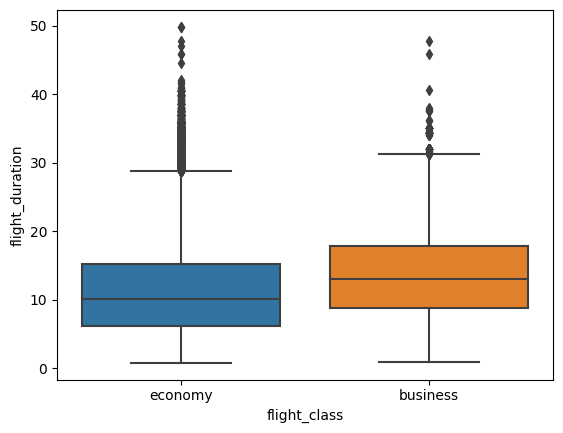

In [60]:
sns.boxplot(x='flight_class', y= 'flight_duration', data=flights)
plt.show()

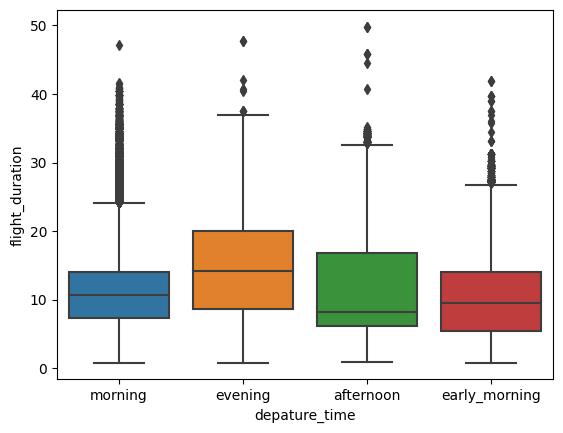

In [61]:
sns.boxplot(x='depature_time', y= 'flight_duration', data=flights)
plt.show()

**C. Scikit-learn pipeline**

**Convert Categorical features to numeric categorical fetaures using onehotencoding**

In [62]:
categorical_features = ['from', 'to', 'airline', 'flight_number', 'flight_class']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_features)])

# 4. Model Construction and Evaluation

**Splitting Data into:**
- X - features all other columns
- y - labels "Price"

In [63]:
X = flights.drop('price', axis=1)
y = flights['price']

**Split into training and testing data**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Define and fit the model**
- Linear Regression

In [65]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['from', 'to', 'airline',
                                                   'flight_number',
                                                   'flight_class'])])),
                ('classifier', LinearRegression())])

**Evaluate model with tst data**

In [66]:
print(clf.score(X_test, y_test))

0.9061116160560626


**Trail some additional Preproccessing to impove results**
- add a scaler to the numaric feature "flight_duration"

In [67]:
categorical_features = ['from', 'to', 'airline', 'flight_number', 'flight_class']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = ['flight_duration']
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)],
        )

**Re-access Model with changes to numerical features**

In [68]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


0.9110757227271272
